# Batch Segmentation for Remote Sensing Imagery with SAM 3

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/sam3_batch_segmentation.ipynb)

This notebook demonstrates how to do batch segmentation for remote sensing imagery with SAM 3.

## Installation

First, make sure you have the required dependencies installed:

In [2]:
!pip install "segment-geospatial[samgeo3]"
!pip install leafmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of sam3 to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.9/632.9 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Libraries


In [3]:
import leafmap
from samgeo import SamGeo3, download_file

To use SamGeo 2, install it as:
	pip install segment-geospatial[samgeo2]


## Download Sample Data

Let's download sample satellite images covering the University of California, Berkeley, for testing:


In [10]:
image_paths = []
# domain link
# https://www.domain.com.au/177-anson-street-orange-nsw-2800-2020463720
urls = [
    'https://rimh2.domainstatic.com.au/jGyutjSpxDbO9xtKogtJYbeMJks=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_4_1_251202_042854-w7008-h4672',
    'https://rimh2.domainstatic.com.au/Ymn0SazaEgZR70oqgxOlnnKAa8U=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_8_1_251202_042854-w7008-h4673',
    'https://rimh2.domainstatic.com.au/ToAHMry4LB4ps6jfHNC3mGYmieQ=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_9_1_251202_042854-w7010-h4674',
    'https://rimh2.domainstatic.com.au/khhj6jv6tBkAp2EIuiUQ_sAihvU=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_25_1_251202_042854-w7012-h4678',
]
for url in urls:
    # url = f"https://huggingface.co/datasets/giswqs/geospatial/resolve/main/uc_berkeley_{i}.tif"
    image_path = download_file(url)
    image_paths.append(image_path)

Downloading...
From: https://rimh2.domainstatic.com.au/jGyutjSpxDbO9xtKogtJYbeMJks=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_4_1_251202_042854-w7008-h4672
To: /content/2020463720_4_1_251202_042854-w7008-h4672
100%|██████████| 339k/339k [00:00<00:00, 79.5MB/s]
Downloading...
From: https://rimh2.domainstatic.com.au/Ymn0SazaEgZR70oqgxOlnnKAa8U=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_8_1_251202_042854-w7008-h4673
To: /content/2020463720_8_1_251202_042854-w7008-h4673
100%|██████████| 245k/245k [00:00<00:00, 55.9MB/s]
Downloading...
From: https://rimh2.domainstatic.com.au/ToAHMry4LB4ps6jfHNC3mGYmieQ=/fit-in/1920x1080/filters:format(webp):quality(85):no_upscale()/2020463720_9_1_251202_042854-w7010-h4674
To: /content/2020463720_9_1_251202_042854-w7010-h4674
100%|██████████| 225k/225k [00:00<00:00, 45.9MB/s]
Downloading...
From: https://rimh2.domainstatic.com.au/khhj6jv6tBkAp2EIuiUQ_sAihvU=/fit-in/1920x1080/filters:format(webp)

In [5]:
m = leafmap.Map()
for i, image_path in enumerate(image_paths):
    m.add_raster(image_path, layer_name=f"image_{i + 1}")
m

Map(center=[37.8715, -122.2635], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

## Request access to SAM3

To use SAM3, you need to request access by filling out this form on Hugging Face: https://huggingface.co/facebook/sam3

Once you have access, uncomment the following code block and run it.

In [7]:
from huggingface_hub import login
login()

## Initialize SAM3

When initializing SAM3, you can choose the backend from "meta", or "transformers".

In [8]:
sam3 = SamGeo3(backend="meta", device=None, checkpoint_path=None, load_from_HF=True)

Using cuda device and meta backend


config.json:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

sam3.pt:   0%|          | 0.00/3.45G [00:00<?, ?B/s]

## Set the image batch

In [13]:
sam3.set_image_batch(image_paths)

Set 4 images for batch processing.


## Generate masks with text prompt

Generate masks for all images with a text prompt

In [14]:
sam3.generate_masks_batch("wall", min_size=100)

Processed 4 image(s), found 29 total object(s).


In [15]:
# Access results for each image
for i, result in enumerate(sam3.batch_results):
    print(f"Image {i + 1}: Found {len(result['masks'])} objects")
    # result contains: masks, boxes, scores, image, source

Image 1: Found 11 objects
Image 2: Found 8 objects
Image 3: Found 3 objects
Image 4: Found 7 objects


In [22]:
import numpy as np
from PIL import Image
import io
import base64

# This list will store base64 encoded masks for all images and all objects
all_encoded_masks_data = []

if sam3.batch_results:
    for img_idx, result in enumerate(sam3.batch_results):
        print(f"Processing Image {img_idx + 1}...")
        image_masks_data = []
        if result['masks'] is not None:
            for mask_idx, mask in enumerate(result['masks']):
                # Convert boolean mask to an 8-bit grayscale image (0 or 255)
                # Ensure the mask is boolean or convert to it if necessary
                mask_image_data = (mask.astype(np.uint8) * 255)

                # Fix: Squeeze the mask_image_data to ensure it's 2D for 'L' mode
                mask_image_data = mask_image_data.squeeze()

                # Create a PIL Image from the numpy array
                # Use 'L' mode for single-channel (grayscale) image
                mask_pil_image = Image.fromarray(mask_image_data, mode='L')

                # Save the image to a byte stream and then base64 encode it
                buffered = io.BytesIO()
                mask_pil_image.save(buffered, format="PNG")
                encoded_mask = base64.b64encode(buffered.getvalue()).decode('utf-8')
                image_masks_data.append({
                    "mask_id": f"image_{img_idx+1}_mask_{mask_idx+1}",
                    "data": encoded_mask,
                    "score": result['scores'][mask_idx] if 'scores' in result and len(result['scores']) > mask_idx else None
                })
            print(f"  Extracted {len(image_masks_data)} masks from Image {img_idx + 1}.")
            all_encoded_masks_data.append(image_masks_data)
        else:
            print(f"  No masks found for Image {img_idx + 1}.")

    print("\nAll masks have been extracted and base64 encoded.")
    print(f"Total images with masks processed: {len(all_encoded_masks_data)}")
    if all_encoded_masks_data:
        print(f"Example of one encoded mask data structure for the first mask of the first image:")
        # Accessing the first mask of the first image (assuming it exists)
        if all_encoded_masks_data[0]:
            first_mask_data_example = all_encoded_masks_data[0][0]
            print(f"  Mask ID: {first_mask_data_example['mask_id']}")
            print(f"  Base64 Data (snippet): {first_mask_data_example['data'][:100]}...")
            print(f"  Score: {first_mask_data_example['score']}")
        else:
            print("  First image has no masks.")

else:
    print("sam3.batch_results is empty. Please ensure masks are generated before trying to extract them.")

Processing Image 1...
  Extracted 11 masks from Image 1.
Processing Image 2...
  Extracted 8 masks from Image 2.
Processing Image 3...
  Extracted 3 masks from Image 3.
Processing Image 4...
  Extracted 7 masks from Image 4.

All masks have been extracted and base64 encoded.
Total images with masks processed: 4
Example of one encoded mask data structure for the first mask of the first image:
  Mask ID: image_1_mask_1
  Base64 Data (snippet): iVBORw0KGgoAAAANSUhEUgAABlQAAAQ4CAAAAABazG5sAAARHUlEQVR4nO3dyXLbOhRF0atX/v9f9hvYSSxZDZsDsblrTZyB42Jx...
  Score: 0.606320321559906


In [23]:
import os

output_dir_base64 = "output/base64_masks"
os.makedirs(output_dir_base64, exist_ok=True)

print(f"Saving base64 encoded masks to: {output_dir_base64}")

for image_masks in all_encoded_masks_data:
    for mask_data in image_masks:
        mask_id = mask_data['mask_id']
        encoded_data = mask_data['data']

        file_path = os.path.join(output_dir_base64, f"{mask_id}.txt")
        with open(file_path, "w") as f:
            f.write(encoded_data)
        print(f"Saved {mask_id}.txt")

print("All base64 encoded masks have been saved.")

Saving base64 encoded masks to: output/base64_masks
Saved image_1_mask_1.txt
Saved image_1_mask_2.txt
Saved image_1_mask_3.txt
Saved image_1_mask_4.txt
Saved image_1_mask_5.txt
Saved image_1_mask_6.txt
Saved image_1_mask_7.txt
Saved image_1_mask_8.txt
Saved image_1_mask_9.txt
Saved image_1_mask_10.txt
Saved image_1_mask_11.txt
Saved image_2_mask_1.txt
Saved image_2_mask_2.txt
Saved image_2_mask_3.txt
Saved image_2_mask_4.txt
Saved image_2_mask_5.txt
Saved image_2_mask_6.txt
Saved image_2_mask_7.txt
Saved image_2_mask_8.txt
Saved image_3_mask_1.txt
Saved image_3_mask_2.txt
Saved image_3_mask_3.txt
Saved image_4_mask_1.txt
Saved image_4_mask_2.txt
Saved image_4_mask_3.txt
Saved image_4_mask_4.txt
Saved image_4_mask_5.txt
Saved image_4_mask_6.txt
Saved image_4_mask_7.txt
All base64 encoded masks have been saved.


## Show results

In [1]:
# Visualize all annotations in a grid
sam3.show_anns_batch(ncols=2, show_bbox=True, show_score=True)

NameError: name 'sam3' is not defined

## Save results

In [17]:
sam3.show_anns_batch(output_dir="output/annotations/", prefix="ann", dpi=300)

Saved annotations to output/annotations/ann_1.png
Saved annotations to output/annotations/ann_2.png
Saved annotations to output/annotations/ann_3.png
Saved annotations to output/annotations/ann_4.png


In [ ]:
# Save all masks to disk
saved_files = sam3.save_masks_batch(
    output_dir="output/", prefix="building_mask", unique=True
)

# Task
Combine all individual base64-encoded masks for each image in `all_encoded_masks_data` into a single composite mask using a logical OR operation, save these composite masks as PNG files in a new directory named "output/combined_masks", and then display one of the saved composite masks to confirm the successful merging and visualization of the masks.

## Load and Combine Masks

### Subtask:
Iterate through each image's masks in `all_encoded_masks_data`. For each image, decode all its base64 masks, combine them into a single composite mask using logical OR operation, and store the resulting composite mask.


**Reasoning**:
The subtask requires iterating through each image's masks, decoding them from base64, and combining them into a single composite mask using a logical OR operation. This code block initializes a list to store these composite masks and performs the decoding and combining steps as outlined in the instructions.



In [29]:
combined_masks_data = []

for img_idx, image_masks in enumerate(all_encoded_masks_data):
    print(f"Combining masks for Image {img_idx + 1}...")
    composite_mask = None

    if image_masks:
        for mask_item in image_masks:
            encoded_mask_data = mask_item['data']

            # Decode base64 string
            decoded_bytes = base64.b64decode(encoded_mask_data)

            # Create a file-like object and open as PIL Image
            mask_pil_image = Image.open(io.BytesIO(decoded_bytes))

            # Convert to NumPy array (boolean type for logical OR)
            current_mask_array = np.array(mask_pil_image).astype(bool)

            if composite_mask is None:
                composite_mask = current_mask_array
            else:
                composite_mask = np.logical_or(composite_mask, current_mask_array)

        combined_masks_data.append(composite_mask)
        print(f"  Combined {len(image_masks)} masks for Image {img_idx + 1}.")
    else:
        print(f"  No masks to combine for Image {img_idx + 1}.")

print("All masks have been combined into composite masks.")
print(f"Total composite masks generated: {len(combined_masks_data)}")


Combining masks for Image 1...
  Combined 11 masks for Image 1.
Combining masks for Image 2...
  Combined 8 masks for Image 2.
Combining masks for Image 3...
  Combined 3 masks for Image 3.
Combining masks for Image 4...
  Combined 7 masks for Image 4.
All masks have been combined into composite masks.
Total composite masks generated: 4


**Reasoning**:
Now that the masks have been combined, the next step is to save these composite masks as PNG files in the specified output directory to complete the saving part of the main task.



In [30]:
output_dir_combined = "output/combined_masks"
os.makedirs(output_dir_combined, exist_ok=True)

print(f"Saving combined masks to: {output_dir_combined}")

for img_idx, composite_mask in enumerate(combined_masks_data):
    # Convert boolean NumPy array to 8-bit grayscale image (0 or 255)
    mask_image_data_8bit = (composite_mask * 255).astype(np.uint8)

    # Create a PIL Image from the NumPy array
    composite_pil_image = Image.fromarray(mask_image_data_8bit, mode='L')

    # Define the file path
    file_path = os.path.join(output_dir_combined, f"combined_mask_image_{img_idx + 1}.png")

    # Save the image
    composite_pil_image.save(file_path)
    print(f"Saved {os.path.basename(file_path)}")

print("All combined masks have been saved.")

Saving combined masks to: output/combined_masks
Saved combined_mask_image_1.png
Saved combined_mask_image_2.png
Saved combined_mask_image_3.png
Saved combined_mask_image_4.png
All combined masks have been saved.


**Reasoning**:
To complete the subtask, one of the saved composite masks needs to be displayed to confirm successful merging and visualization. Loading and displaying the first combined mask will fulfill this requirement.



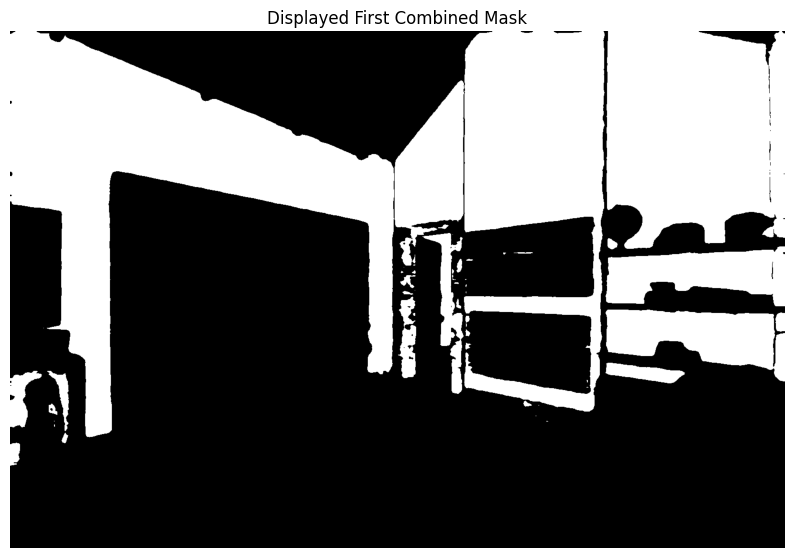

Displayed the first combined mask.


In [32]:
import matplotlib.pyplot as plt

# Choose one of the saved combined masks to display
# For example, display the first combined mask
if combined_masks_data:
    first_combined_mask = combined_masks_data[1]

    plt.figure(figsize=(10, 10))
    plt.imshow(first_combined_mask, cmap='gray')
    plt.title('Displayed First Combined Mask')
    plt.axis('off')
    plt.show()

    print("Displayed the first combined mask.")
else:
    print("No combined masks available to display.")

## Final Task

### Subtask:
Summarize the process of joining masks and confirm the successful creation and visualization of composite masks.


## Summary:

### Q&A
The process successfully combined individual base64-encoded masks for each image into a single composite mask using a logical OR operation, saved these composite masks as PNG files, and then displayed one of the saved composite masks, confirming successful merging and visualization.

### Data Analysis Key Findings
*   The code successfully combined masks for each image by decoding base64 data, converting them to boolean NumPy arrays, and applying `np.logical_or` to create composite masks.
*   A total of 4 composite masks were generated, corresponding to the 4 images processed.
*   A new directory, `output/combined_masks`, was created to store the results.
*   Each composite mask was converted from a boolean NumPy array to an 8-bit grayscale PIL Image and saved as a PNG file.
*   All 4 composite masks were successfully saved in the specified output directory.
*   The first generated composite mask was successfully displayed using `matplotlib.pyplot`, visually confirming the merging of individual masks.

### Insights or Next Steps
*   The generated composite masks are ready for subsequent steps in the pipeline, such as overlaying them on original images for visual inspection or using them as inputs for further image processing tasks.
*   Consider evaluating the quality of the combined masks quantitatively, especially if the original masks had varying confidence scores or overlaps, to ensure the logical OR operation yielded the desired outcome without introducing noise or losing critical information.
